In [1]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
dataset = pd.read_csv('debug/monitoring.csv', sep='\t')
keys_as_float = ['tmp', 'val', 'config', 'sb_oc', 'sb_unused']
for key in keys_as_float: dataset[key] = dataset[key].apply(lambda x : None if x == 'None' else float(x))
dataset['time'] = dataset['tmp'] / 60

/tmp/ipykernel_3372086/3168552183.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('debug/monitoring.csv', sep='\t')


In [3]:
dataset.head()

,tmp,rec,res,val,config,subset,vm_uuid,vm_cmn,sb_oc,sb_unused,sb_dsc
0,0.0,global,cpu,NaN,231.0,None,None,None,NaN,NaN,None
1,0.0,global,mem,0.109490,1031752.0,None,None,None,NaN,NaN,None
2,10.0,global,cpu,0.002054,231.0,None,None,None,NaN,NaN,None
3,10.0,subset,cpu,NaN,2.0,subset-1.0,None,None,1.0,0.0,"{""res_list"": [{""cpu_id"": 25, ""numa_node"": 0, ""..."
4,10.0,vm,cpu,NaN,1.0,subset-1.0,4c2715d9-36b8-41dd-a66a-525eca3c498f,vm0,1.0,NaN,None


# Investigate global usage

In [4]:
overall = dataset.loc[dataset['rec'] == 'global']
overall_cpu = overall.loc[overall['res'] == 'cpu']
overall_mem = overall.loc[overall['rec'] == 'mem']

In [27]:
# Convert percent to CPU cores
pd.options.mode.chained_assignment = None  # default='warn'
overall_cpu['cores'] = overall_cpu['val'] * 256

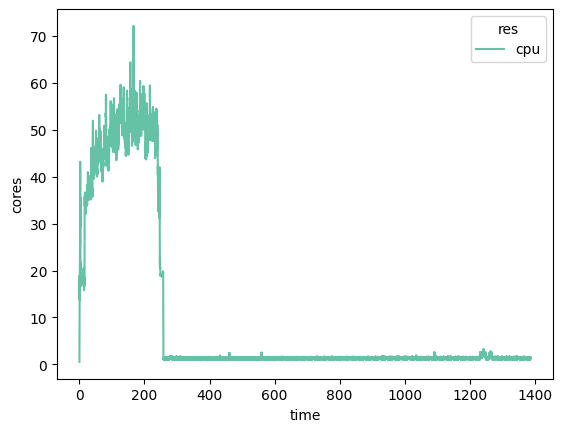

In [28]:
palette = sns.color_palette("Set2", overall_cpu['res'].nunique())

g_val = sns.lineplot(data=overall_cpu, x='time', y='cores', hue='res', palette=palette)

# Investigate subsets usage

In [52]:
subsets = dataset.loc[dataset['rec'] == 'subset']
subsets_cpu = subsets.loc[subsets['res'] == 'cpu']
subsets_mem = subsets.loc[subsets['rec'] == 'mem']

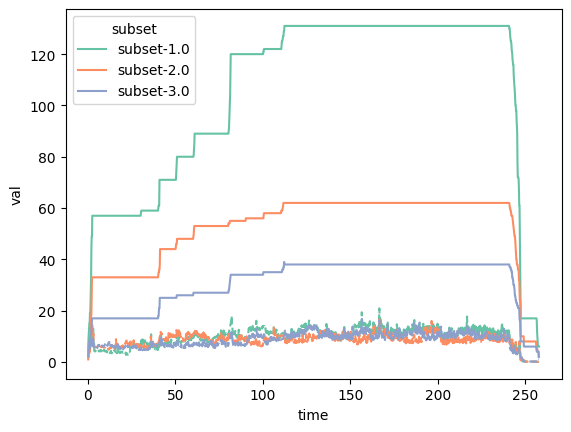

In [54]:
palette = sns.color_palette("Set2", subsets_cpu['subset'].nunique())

g_val = sns.lineplot(data=subsets_cpu, x='time', y='val', hue='subset', linestyle ='--', palette=palette, legend=False)
g_config = sns.lineplot(data=subsets_cpu, x='time', y='config', hue='subset', palette=palette)

# Investigate VM usage

In [48]:
vm = dataset.loc[dataset['rec'] == 'vm']
vm_cpu = vm.loc[vm['res'] == 'cpu']
vm_mem = vm.loc[vm['rec'] == 'mem']

In [49]:
# Convert percent to CPU cores
pd.options.mode.chained_assignment = None  # default='warn'
vm_cpu['cores'] = vm_cpu['val'] * vm_cpu['config']

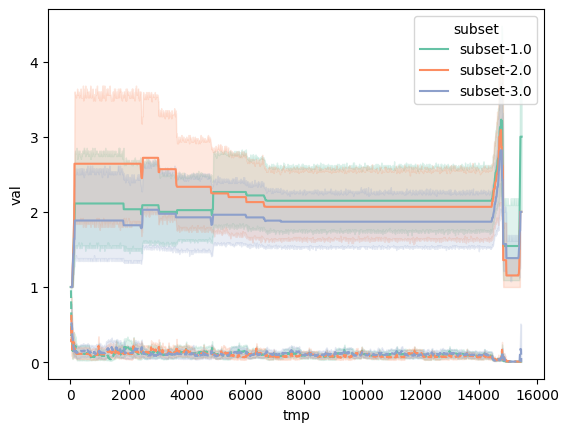

In [32]:
palette = sns.color_palette("Set2", vm_cpu['subset'].nunique())

g_val = sns.lineplot(data=vm_cpu, x='time', y='val', hue='subset', linestyle ='--', palette=palette, legend=False)
g_config = sns.lineplot(data=vm_cpu, x='time', y='config', hue='subset', palette=palette)

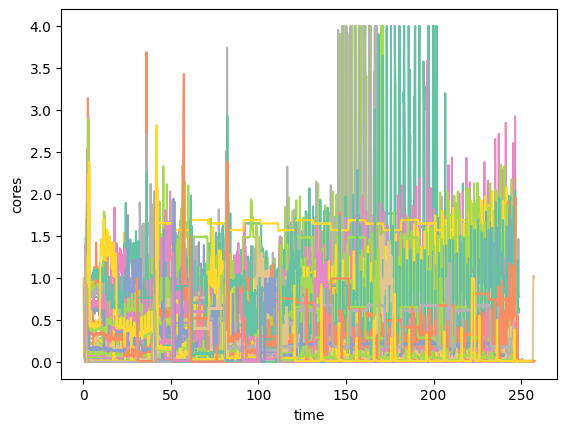

In [50]:
palette = sns.color_palette("Set2", vm_cpu['vm_uuid'].nunique())

g_val = sns.lineplot(data=vm_cpu, x='time', y='cores', hue='vm_uuid', palette=palette, legend=False)

# Dive into subset configuration

In [12]:
import json
subsets_unarchived = subsets
example = json.loads(subsets_unarchived['sb_dsc'].iloc[0])
print(len(example['consumer_list']))

2


In [ ]:
subsets_unarchived['list_vm']  = subsets_unarchived['sb_dsc'].apply(lambda x : json.loads(x)['consumer_list'])
subsets_unarchived['count_vm'] = subsets_unarchived['sb_dsc'].apply(lambda x : len(json.loads(x)['consumer_list']))

In [ ]:
palette = sns.color_palette("Set2", subsets_unarchived['res'].nunique())

g_val = sns.lineplot(data=subsets_unarchived.loc[subsets_unarchived['res'] == 'cpu'], x='time', y='count_vm', hue='res', palette=palette)
g_val = sns.lineplot(data=subsets_unarchived.loc[subsets_unarchived['res'] == 'mem'], x='time', y='count_vm', hue='res', linestyle='--')